<a href="https://colab.research.google.com/github/Jose34345/Laboratorio_ETL_EDA.ipynb/blob/main/Laboratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LABORATORIO 1 ANALISIS DE DATOS

## ETL

### 1. Extraccion (Extract)

In [1]:
from google.colab import drive
import pandas as pd
import chardet

#Montamos google drive para buscar el archivo
drive.mount("/content/drive", force_remount=True)

ruta_archivo = "/content/drive/MyDrive/transactions_data.csv"
with open (ruta_archivo, 'rb') as f:
  result = chardet.detect(f.read())
  print(result['encoding'])

try:
  df = pd.read_csv(ruta_archivo, sep=',',encoding=result['encoding'])
  print("Extraccion de datos exitosa")
except FileNotFoundError:
  print(f'El archivo no fue encontrado en:{ruta_archivo}')

Mounted at /content/drive
ascii
Extraccion de datos exitosa


### 2. Transformacion(Transform)

In [2]:
#Muestra las primeras 5 filas
print(df.head())

        id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   

            use_chip  merchant_id merchant_city merchant_state      zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523.0  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722.0  5311   
2  Swipe Transaction        27092         Vista             CA  92084.0  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307.0  4829   
4  Swipe Transaction        13051       Harwood             MD  20776.0  5813   

  errors  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


In [3]:
#Resumen de la informaciondel dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [4]:
df.rename(columns={
    'id': 'id_transaccion',
    'date': 'fecha',
    'client_id': 'id_cliente',
    'card_id': 'id_tarjeta',
    'amount': 'monto',
    'use_chip': 'uso_chip',
    'merchant_id': 'id_comercio',
    'merchant_city': 'ciudad_comercio',
    'merchant_state': 'estado_comercio',
    'zip': 'codigo_postal',
    'mcc': 'mcc',  # MCC (Merchant Category Code)
    'errors': 'errores'
},inplace=True)

print(df.columns)

Index(['id_transaccion', 'fecha', 'id_cliente', 'id_tarjeta', 'monto',
       'uso_chip', 'id_comercio', 'ciudad_comercio', 'estado_comercio',
       'codigo_postal', 'mcc', 'errores'],
      dtype='object')


In [5]:
print("Valores en la columna 'errores':")
print(df['errores'].value_counts(dropna=False))

# .notnull() devuelve True si la celda NO es NaN (es decir, si tiene un error)
df['tuvo_error'] = df['errores'].notnull()

#Resultado
print("Conteo de transacciones con y sin error:")
print(df['tuvo_error'].value_counts())

Valores en la columna 'errores':
errores
NaN                                                    13094522
Insufficient Balance                                     130902
Bad PIN                                                   32119
Technical Glitch                                          26271
Bad Card Number                                            7767
Bad Expiration                                             6161
Bad CVV                                                    6106
Bad Zipcode                                                1126
Bad PIN,Insufficient Balance                                293
Insufficient Balance,Technical Glitch                       243
Bad Card Number,Insufficient Balance                         71
Bad PIN,Technical Glitch                                     70
Bad CVV,Insufficient Balance                                 57
Bad Expiration,Insufficient Balance                          47
Bad Card Number,Bad CVV                                      38

In [6]:
#Esto divide la columna 'errores' por la coma ',' y toma el primer elemento (.str[0])
df['error_principal'] = df['errores'].str.split(',').str[0]

#Relleno los valores NaN (exitosos) con 'Sin Error'
df['error_principal'] = df['error_principal'].fillna('Sin Error')

#Resultados
print("\nConteo de Errores Principales:")
print(df['error_principal'].value_counts())


Conteo de Errores Principales:
error_principal
Sin Error               13094522
Insufficient Balance      131145
Bad PIN                    32482
Technical Glitch           26271
Bad Card Number             7925
Bad Expiration              6261
Bad CVV                     6171
Bad Zipcode                 1138
Name: count, dtype: int64


In [7]:
# Relleno los NaN con un string vacío para que .get_dummies funcione bien
errores_limpios = df['errores'].fillna('')

# Uso get_dummies para separar cada error por la coma ','
errores_dummies = errores_limpios.str.get_dummies(sep=',')

# Renombramos las columnas para que sean más claras
errores_dummies = errores_dummies.add_prefix('error_')

# Uno las nuevas columnas al DataFrame original
df = pd.concat([df, errores_dummies], axis=1)

print("\nDataFrame con las nuevas columnas de error:")
df.info()


DataFrame con las nuevas columnas de error:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_transaccion              int64  
 1   fecha                       object 
 2   id_cliente                  int64  
 3   id_tarjeta                  int64  
 4   monto                       object 
 5   uso_chip                    object 
 6   id_comercio                 int64  
 7   ciudad_comercio             object 
 8   estado_comercio             object 
 9   codigo_postal               float64
 10  mcc                         int64  
 11  errores                     object 
 12  tuvo_error                  bool   
 13  error_principal             object 
 14  error_Bad CVV               int64  
 15  error_Bad Card Number       int64  
 16  error_Bad Expiration        int64  
 17  error_Bad PIN               int64  
 18  error_Bad Zipco

In [8]:
print("\nConteo de valores nulos restantes por columna:")
nulos_restantes = df.isnull().sum()
print(nulos_restantes[nulos_restantes > 0]) # Muestra solo columnas que aún tengan nulos

print("\nValores únicos en 'mcc':")
print(df['mcc'].value_counts(dropna=False).head(10))


Conteo de valores nulos restantes por columna:
estado_comercio     1563700
codigo_postal       1652706
errores            13094522
dtype: int64

Valores únicos en 'mcc':
mcc
5411    1592584
5499    1460875
5541    1424711
5812     999738
5912     772913
4784     674135
5300     601942
4829     589140
4121     500662
5814     499659
Name: count, dtype: int64


### 3. Carga (Load)


In [9]:
ruta_salida = "/content/drive/MyDrive/transacciones_limpias.csv"

print(f"Guardando el archivo en: {ruta_salida}")
df.to_csv(ruta_salida, index=False, sep=',')

print("¡Archivo guardado exitosamente en Google Drive!")

Guardando el archivo en: /content/drive/MyDrive/transacciones_limpias.csv
¡Archivo guardado exitosamente en Google Drive!


## EDA

In [9]:
import numpy as np
import pandas as pd

# Asegúrate de que esta celda se ejecute antes de cualquier EDA
# 1. Limpieza de símbolos de formato
df['monto'] = df['monto'].astype(str).str.replace('$', '', regex=False).str.strip()

# 2. Conversión a float, manejando errores (coerce)
df['monto'] = pd.to_numeric(df['monto'], errors='coerce')

# 3. Optimizamos el tipo de dato para ahorrar RAM (ahora sí funcionará)
df['monto'] = df['monto'].astype('float32')

print("¡Columna 'monto' ahora es numérica (float32)!")

¡Columna 'monto' ahora es numérica (float32)!


In [10]:
print("Optimizando tipos de datos para un EDA más rápido...")

if 'estado_comercio' in df.columns:
    df['estado_comercio'] = df['estado_comercio'].astype('category')

if 'uso_chip' in df.columns:
    df['uso_chip'] = df['uso_chip'].astype('category')

if 'mcc' in df.columns:
    df['mcc'] = df['mcc'].astype('category')

print("¡Optimización completa!")
df.info()

Optimizando tipos de datos para un EDA más rápido...
¡Optimización completa!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 21 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   id_transaccion              int64   
 1   fecha                       object  
 2   id_cliente                  int64   
 3   id_tarjeta                  int64   
 4   monto                       object  
 5   uso_chip                    category
 6   id_comercio                 int64   
 7   ciudad_comercio             object  
 8   estado_comercio             category
 9   codigo_postal               float64 
 10  mcc                         category
 11  errores                     object  
 12  tuvo_error                  bool    
 13  error_principal             object  
 14  error_Bad CVV               int64   
 15  error_Bad Card Number       int64   
 16  error_Bad Expiration        int64   
 17  error

Pregunta 1: Top 10 Estados por Monto de Ventas
estado_comercio
CA    59084616.0
TX    42477208.0
NY    39721648.0
FL    28603402.0
IL    19500278.0
PA    18234988.0
NC    16790704.0
OH    16225273.0
MI    15051464.0
NJ    14904753.0
Name: monto, dtype: float32




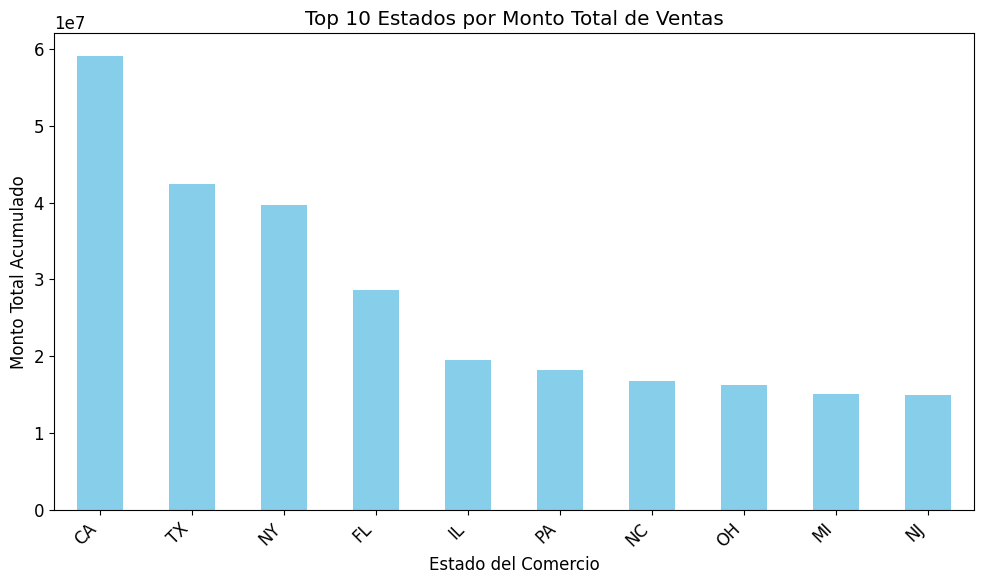

Pregunta 2: Monto Promedio por Método de Uso
uso_chip
Online Transaction    57.256195
Swipe Transaction     41.214901
Chip Transaction      40.889149
Name: monto, dtype: float32




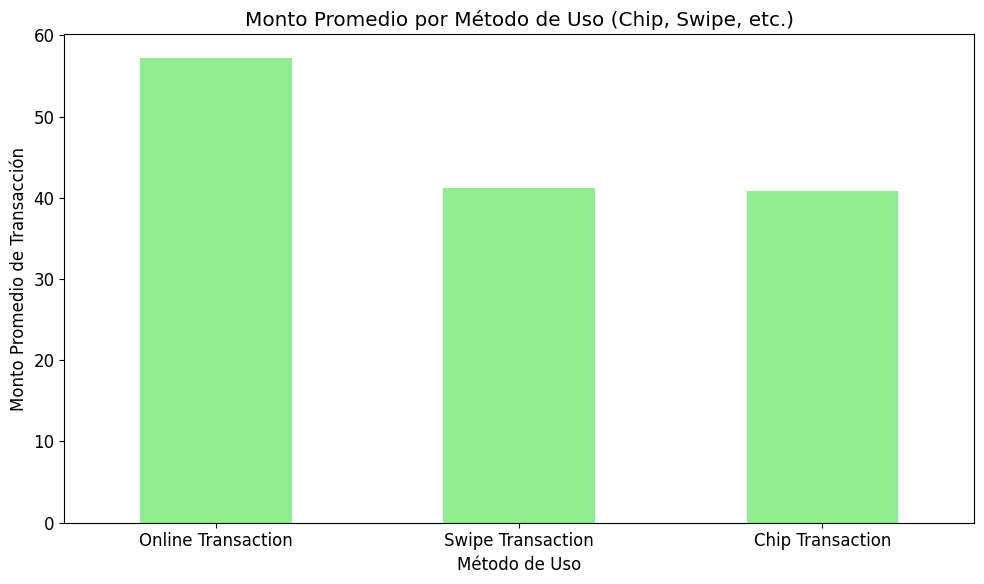

Pregunta 3: Top 5 MCC con más Errores
mcc
5541    23949
5499    20894
4829    18206
5411    18149
4784    13655
Name: tuvo_error, dtype: int64




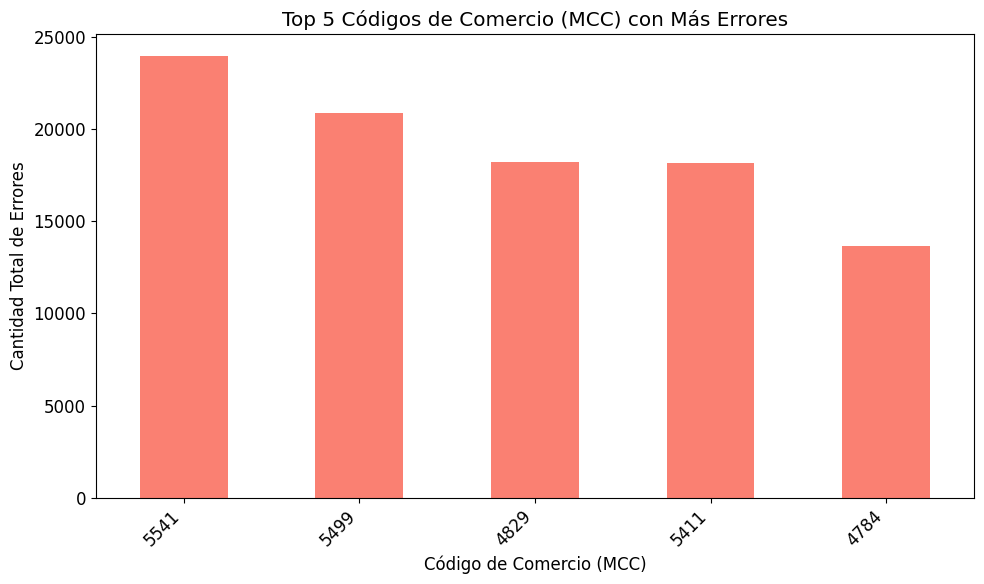

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# PREGUNTA 1: ¿Cuáles son los 10 estados (estado_comercio) con mayor monto total de ventas?

print("Pregunta 1: Top 10 Estados por Monto de Ventas")
ventas_por_estado = df.groupby('estado_comercio')['monto'].sum().sort_values(ascending=False).head(10)

print(ventas_por_estado)
print("\n")

ventas_por_estado.plot(kind='bar', color='skyblue')
plt.title('Top 10 Estados por Monto Total de Ventas')
plt.xlabel('Estado del Comercio')
plt.ylabel('Monto Total Acumulado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('pregunta_1_ventas_por_estado.png')
plt.show()

# PREGUNTA 2: ¿Cuál es el monto promedio de transacción según el método de uso (uso_chip)?

print("Pregunta 2: Monto Promedio por Método de Uso")

#Agrupar por 'uso_chip' y calcular el promedio (media) del monto
monto_promedio_por_uso = df.groupby('uso_chip')['monto'].mean().sort_values(ascending=False)

print(monto_promedio_por_uso)
print("\n")

monto_promedio_por_uso.plot(kind='bar', color='lightgreen')
plt.title('Monto Promedio por Método de Uso (Chip, Swipe, etc.)')
plt.xlabel('Método de Uso')
plt.ylabel('Monto Promedio de Transacción')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('pregunta_2_monto_por_uso.png')
plt.show()


# PREGUNTA 3: ¿Cuáles son los 5 códigos de comercio (MCC) donde se registran más errores?

print("Pregunta 3: Top 5 MCC con más Errores")

errores_por_mcc = df.groupby('mcc')['tuvo_error'].sum().sort_values(ascending=False).head(5)

print(errores_por_mcc)
print("\n")

errores_por_mcc.plot(kind='bar', color='salmon')
plt.title('Top 5 Códigos de Comercio (MCC) con Más Errores')
plt.xlabel('Código de Comercio (MCC)')
plt.ylabel('Cantidad Total de Errores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('pregunta_3_errores_por_mcc.png')
plt.show()
